In [13]:
# Import dependencies
import sys
sys.path.append("notebooks")

import torch
import torch.nn as nn
import torch.nn.functional as F
from plot_lib import set_default, show_scatterplot, plot_bases
import matplotlib.pyplot as plt
import random
import numpy as np

In [3]:
# Set up your device 
cuda = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda else "cpu")

In [4]:
# Set up random seed to 1008. Do not change the random seed.
# Yes, these are all necessary when you run experiments!
seed = 1008
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
if cuda:
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.benchmark = False
    torch.backends.cudnn.deterministic = True

In [5]:
# Define data generating functions
def quadratic_data_generator(data_size):
    # f(x) = y = x^2 + 4x - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    y = x**2+4*x-3

    return x,y

def cubic_data_generator(data_size=100):
    # f(x) = y = x^3 + 4x^2 - 3
    # generate an input tensor of size data_size with torch.randn
    x = torch.randn(data_size, 1) - 2   
    x = x.to(device)
    y=x**3+4*x**2-3
   
    return x, y

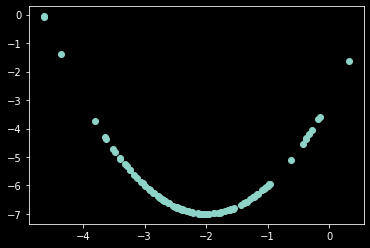

In [21]:
# Generate the data with 128 datapoints
data_size=128
x, y = quadratic_data_generator(data_size)
plt.scatter(x,y)
plt.show()

In [15]:
# Define a Linear Classifier with a single linear layer and no non-linearity
# (no hidden layer)
class Linear_0H(nn.Module):
    def __init__(self,input_size,output_size):
        super().__init__()
        self.fc1=nn.Linear(input_size,output_size)

    def forward(self, x):
        x=self.fc1(x)
        return x

In [29]:
# Define a Linear Classifier with a single hidden layer of size 5 and ReLU non-linearity
class Linear_1H(nn.Module):
    def __init__(self,input_size,output_size):
        super().__init__()
        self.fc1=nn.Linear(input_size,5)
        self.fc2=nn.Linear(5,output_size)

    def forward(self, x):
        x=self.fc1(x)
        x=F.relu(x)
        x=self.fc2(x)
        return x

In [32]:
# Define a Linear Classifier with a single hidden layer of size 5 and ReLU non-linearity
class Linear_2H(nn.Module):
    def __init__(self,input_size,output_size):
        super().__init__()
        self.fc1=nn.Linear(input_size,5)
        self.fc2=nn.Linear(5,5)
        self.fc3=nn.Linear(5,output_size)

    def forward(self, x):
        x=self.fc1(x)
        x=F.relu(x)
        x=self.fc2(x)
        x=F.relu(x)
        x=self.fc3(x)
        return x

In [23]:
'''
TODO: Training function

Hint: look at some example pytorch tutorials to learn how to
    - initialize optimizers
    - zero gradient
    - backprop the loss
    - step the gradient


Note: This is full batch. We compute forward on whole x,y.
No need for dataloaders nor loop over batches. 
Just pass all of x to model's forward pass.
'''
def train(model, epochs, x, y):
    
    # Set model to training mode
    model.train()
    
    # Define MSE loss function
    criterion = torch.nn.MSELoss()
    
    # TODO: Define the SGD optimizer with learning rate 0.01
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
    
    for epoch in range(epochs):
        
        # TODO: Forward data through model to predict y
        y_pred = model(x)
        
        # TODO: Compute loss in terms of predicted and true y
        loss = criterion(y_pred,y)

        # TODO: Zero gradient
        optimizer.zero_grad()
        
        # TODO: call backward on loss
        loss.backward()

        # TODO: step the optimizer
        optimizer.step()

        # every 100 epochs, print
        if (epoch+1) % 100 == 0:
            print('Epoch {} loss: {}'.format(epoch+1, loss.item()))
            
    # return y_pred without gradient information, for plotting
    return y_pred.detach()

Epoch 100 loss: 4.747470855712891
Epoch 200 loss: 3.4820330142974854
Epoch 300 loss: 2.723353862762451
Epoch 400 loss: 2.26849627494812
Epoch 500 loss: 1.9957914352416992
Epoch 600 loss: 1.832294225692749
Epoch 700 loss: 1.734271764755249
Epoch 800 loss: 1.6755037307739258
Epoch 900 loss: 1.6402697563171387
Epoch 1000 loss: 1.6191456317901611


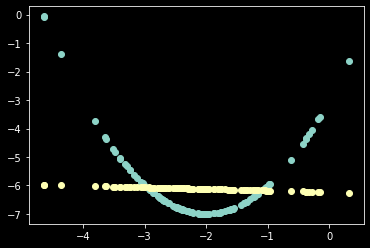

In [30]:
# 0H model on quadratic data
model = Linear_0H(1,1)
y_pred = train(model, epochs=1000, x=x, y=y)

# Plot predictions vs actual data
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 1.7729170322418213
Epoch 200 loss: 0.6150059700012207
Epoch 300 loss: 0.3600037097930908
Epoch 400 loss: 0.26530781388282776
Epoch 500 loss: 0.23015131056308746
Epoch 600 loss: 0.20724880695343018
Epoch 700 loss: 0.1882096529006958
Epoch 800 loss: 0.1815773844718933
Epoch 900 loss: 0.17871125042438507
Epoch 1000 loss: 0.17721688747406006


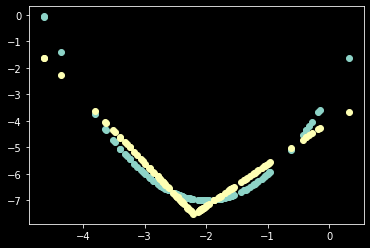

In [31]:
# 1H model on quadratic data
model = Linear_1H(1,1)
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 1.3326350450515747
Epoch 200 loss: 0.7109247446060181
Epoch 300 loss: 0.6566295623779297
Epoch 400 loss: 0.37820863723754883
Epoch 500 loss: 0.2807121276855469
Epoch 600 loss: 0.18277598917484283
Epoch 700 loss: 0.1309109777212143
Epoch 800 loss: 0.07713758200407028
Epoch 900 loss: 0.041973941028118134
Epoch 1000 loss: 0.03167674317955971


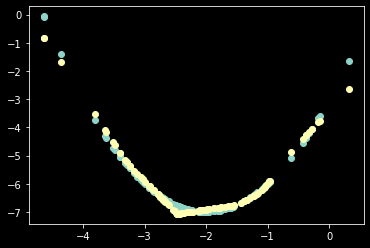

In [34]:
# 2H model on quadratic data
model = Linear_2H(1,1)
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

In [35]:
# Generate cubic data with 128 data points
x, y = cubic_data_generator(128)

Epoch 100 loss: 7.159453868865967
Epoch 200 loss: 7.120039463043213
Epoch 300 loss: 7.099043846130371
Epoch 400 loss: 7.0878586769104
Epoch 500 loss: 7.081900596618652
Epoch 600 loss: 7.0787272453308105
Epoch 700 loss: 7.077035903930664
Epoch 800 loss: 7.076135158538818
Epoch 900 loss: 7.075655937194824
Epoch 1000 loss: 7.075400352478027


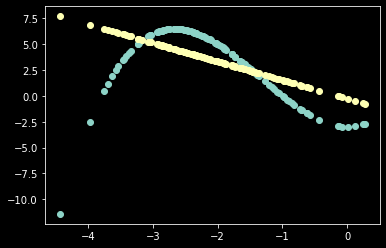

In [36]:
# 0H model on cubic data
model = Linear_0H(1,1)
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 7.198568344116211
Epoch 200 loss: 6.806451320648193
Epoch 300 loss: 6.070768356323242
Epoch 400 loss: 5.53532600402832
Epoch 500 loss: 5.119963645935059
Epoch 600 loss: 4.763550758361816
Epoch 700 loss: 4.398582935333252
Epoch 800 loss: 3.972775936126709
Epoch 900 loss: 3.4773223400115967
Epoch 1000 loss: 2.967872142791748


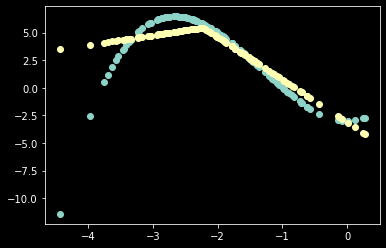

In [37]:
# 1H model on cubic data
model = Linear_1H(1,1)
y_pred = train(model, epochs=1000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()

Epoch 100 loss: 7.313069820404053
Epoch 200 loss: 7.193248748779297
Epoch 300 loss: 7.160701274871826
Epoch 400 loss: 7.1382155418396
Epoch 500 loss: 7.123879909515381
Epoch 600 loss: 7.113778591156006
Epoch 700 loss: 7.105047225952148
Epoch 800 loss: 7.098205089569092
Epoch 900 loss: 7.09406042098999
Epoch 1000 loss: 7.090723991394043
Epoch 1100 loss: 7.087728977203369
Epoch 1200 loss: 7.0848822593688965
Epoch 1300 loss: 7.082141399383545
Epoch 1400 loss: 7.079494953155518
Epoch 1500 loss: 7.077816963195801
Epoch 1600 loss: 7.076940059661865
Epoch 1700 loss: 7.076249122619629
Epoch 1800 loss: 7.0756635665893555
Epoch 1900 loss: 7.075326442718506
Epoch 2000 loss: 7.075094223022461
Epoch 2100 loss: 7.074912071228027
Epoch 2200 loss: 7.074735164642334
Epoch 2300 loss: 7.0745086669921875
Epoch 2400 loss: 7.074163913726807
Epoch 2500 loss: 7.073394298553467
Epoch 2600 loss: 7.071957111358643
Epoch 2700 loss: 7.069391250610352
Epoch 2800 loss: 7.063548564910889
Epoch 2900 loss: 7.0106649398

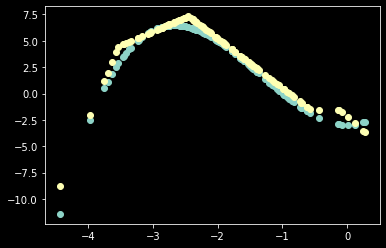

In [39]:
# 2H model on cubic data
model = Linear_2H(1,1)
y_pred = train(model, epochs=10000, x=x, y=y)
plt.scatter(x, y)
plt.scatter(x, y_pred)
plt.show()